##### EDA

In [21]:
import pandas as pd
df = pd.read_csv('dataset/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [23]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [3]:
df.shape

(2200, 8)

In [4]:
# Check duplicated value
df.duplicated().sum()

0

In [5]:
# Check null value
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

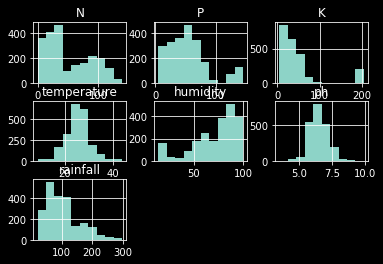

In [6]:
df.hist();

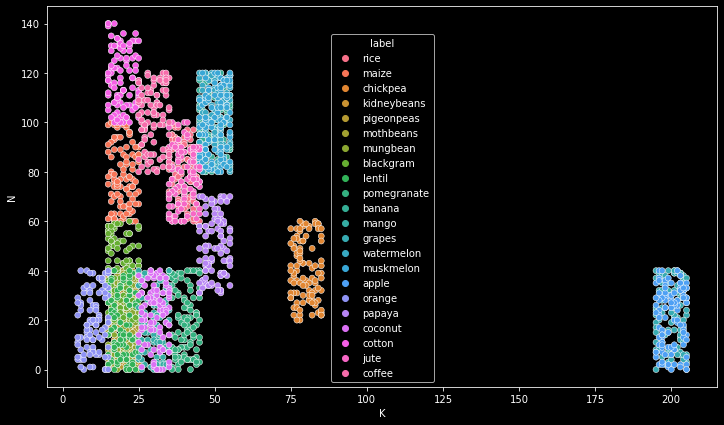

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(12,7)) 
sns.scatterplot(data = df, x = 'K', y='N', hue='label');


In [8]:
from sklearn.preprocessing import LabelEncoder
df['label'] = LabelEncoder().fit_transform(df['label'])

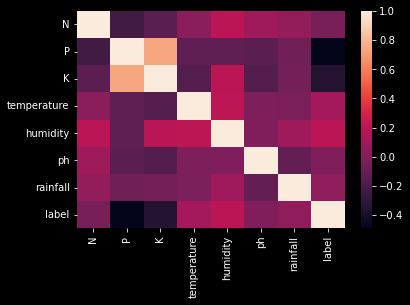

In [9]:
sns.heatmap(data= df.corr());

#### PREPROCESSING

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('label', axis=1)
y = df.label
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2,stratify=y )

In [11]:
label_len  = len(df.label.unique())
X_train.shape[1:]

(7,)

##### MODELING

In [12]:
# Create model architecture using functional API
from tensorflow.keras import layers, Model
input = layers.Input(shape=X_train.shape[1:])
hidden1 = layers.Dense(128,activation='relu')(input)
normalization = layers.BatchNormalization()(hidden1)
hidden2 = layers.Dense(64,activation='relu' )(normalization)
dropout = layers.Dropout(0.2)(hidden2)
output = layers.Dense(22, activation='softmax')(dropout)
model = Model(inputs=input, outputs= output)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-01-08 20:31:04.956284: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-08 20:31:04.956441: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 22)                1430      
Total params: 11,222
Trainable params: 10,966
Non-trainable params: 256
_______________________________________________________

In [14]:
# Compile and train
import numpy as np
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, np.array(y_train), epochs=50,validation_data=(X_test,np.array(y_test)))

2022-01-08 20:31:05.150143: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2022-01-08 20:31:05.311460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


55/55 [==============================] - 3s 11ms/step - loss: 1.8688 - accuracy: 0.4915 - val_loss: 1.6291 - val_accuracy: 0.5386
Epoch 2/50
 1/55 [..............................] - ETA: 0s - loss: 1.0082 - accuracy: 0.7188

2022-01-08 20:31:08.002419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


55/55 [==============================] - 0s 7ms/step - loss: 0.7747 - accuracy: 0.8170 - val_loss: 0.9105 - val_accuracy: 0.6727
Epoch 3/50
55/55 [==============================] - 0s 6ms/step - loss: 0.4615 - accuracy: 0.8744 - val_loss: 0.5097 - val_accuracy: 0.8227
Epoch 4/50
55/55 [==============================] - 0s 7ms/step - loss: 0.3433 - accuracy: 0.9028 - val_loss: 0.2758 - val_accuracy: 0.8955
Epoch 5/50
55/55 [==============================] - 0s 7ms/step - loss: 0.2791 - accuracy: 0.9165 - val_loss: 0.1663 - val_accuracy: 0.9545
Epoch 6/50
55/55 [==============================] - 0s 6ms/step - loss: 0.2121 - accuracy: 0.9449 - val_loss: 0.1545 - val_accuracy: 0.9432
Epoch 7/50
55/55 [==============================] - 0s 6ms/step - loss: 0.2234 - accuracy: 0.9284 - val_loss: 0.1062 - val_accuracy: 0.9795
Epoch 8/50
55/55 [==============================] - 0s 7ms/step - loss: 0.1967 - accuracy: 0.9369 - val_loss: 0.0870 - val_accuracy: 0.9795
Epoch 9/50
55/55 [=============

In [15]:
# Evaluate  
model_eval = model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 4ms/step - loss: 0.0538 - accuracy: 0.9750


In [16]:
# Create function plotting for model tracking
def plot_model_eval(data):
    pd.DataFrame(data.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

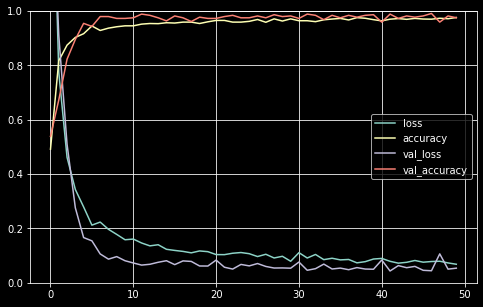

In [17]:
# Plot tracking history
plot_model_eval(history)

In [18]:
y_pred =  model.predict(X_test)
y_pred[0]  

2022-01-08 20:31:25.129135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([1.5711183e-06, 7.5607968e-06, 7.0393611e-09, 4.3589801e-10,
       4.5019397e-06, 1.4720128e-08, 2.1521648e-08, 6.9504722e-09,
       3.3197168e-03, 5.3629845e-10, 1.2053807e-10, 8.4502627e-09,
       2.2867032e-07, 4.3326658e-11, 2.2726105e-08, 1.3901037e-07,
       1.1323566e-08, 9.9619108e-01, 3.1703486e-05, 2.3989972e-07,
       4.4323137e-04, 1.7172196e-08], dtype=float32)

In [19]:
# model.save('recommender_system.h5')

In [20]:
from sklearn.metrics import classification_report
# Predict validation data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
# # Get true classes and predicted classes 
# true_classes = X_test.classes 
# class_labels = list(X_test.class_indices.keys())

# Have a look classification report
report = classification_report(y_test, predicted_classes)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       0.95      1.00      0.98        20
           6       1.00      0.95      0.97        20
           7       1.00      1.00      1.00        20
           8       0.87      0.65      0.74        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    